# Load Data


# Read and Preprocessing

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df_1 = pd.read_csv('/content/mitbih_train.csv',header=None)
df_2 = pd.read_csv('/content/mitbih_test.csv',header=None)
df = pd.concat([df_1,df_2],axis=0)

print(df[187].unique())
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/mitbih_train.csv'

- 0: N
- 1: S
- 2: V
- 3: F
- 4: Q

dominat one is 0

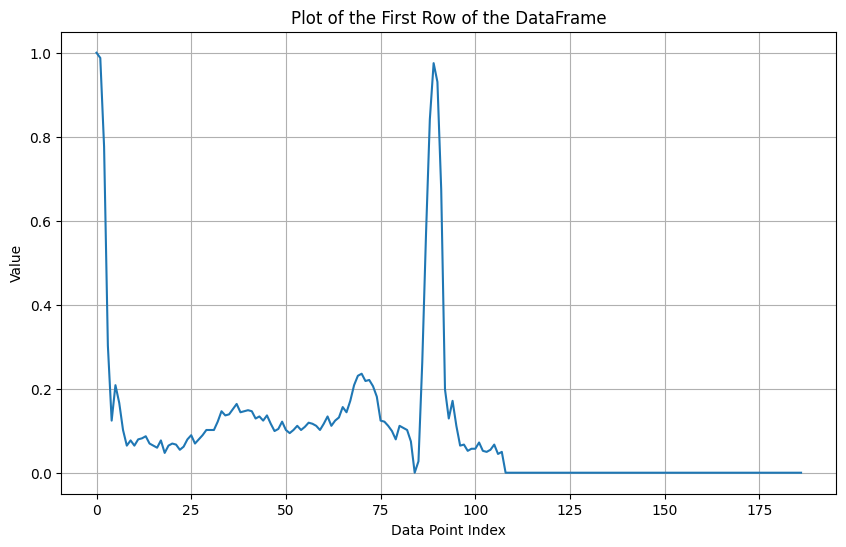

In [ ]:
row_to_plot = df.iloc[1000, :-1]

plt.figure(figsize=(10, 6))
plt.plot(row_to_plot)
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Plot of the First Row of the DataFrame")
plt.grid(True)
plt.show()


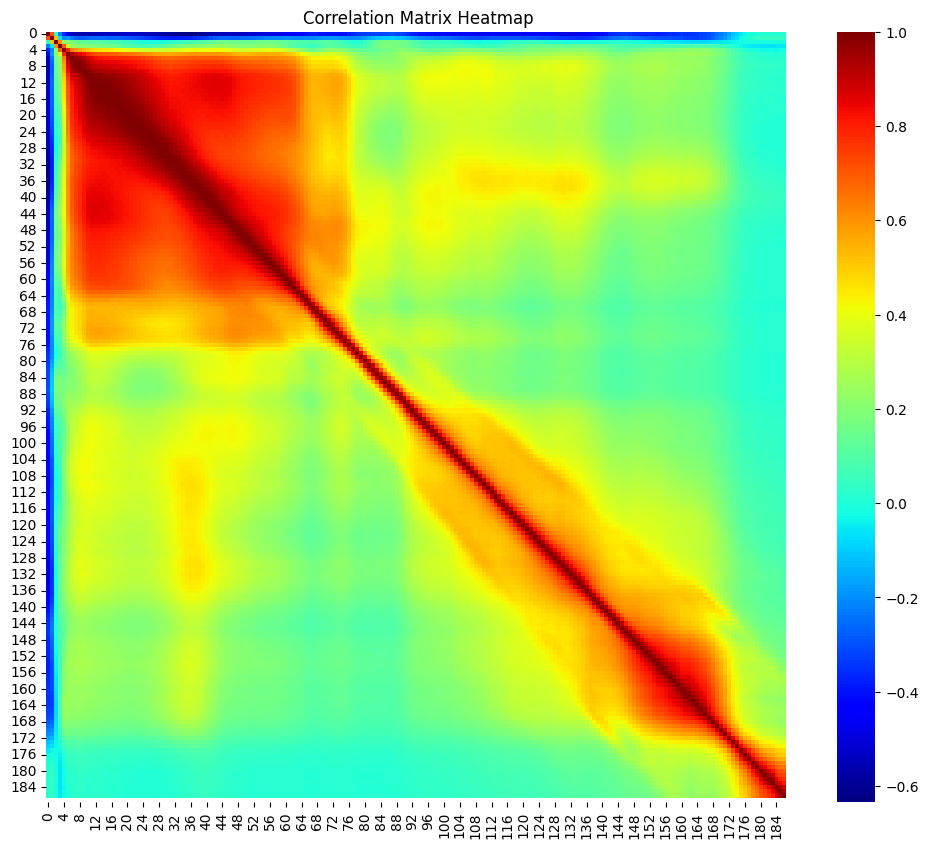

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='jet', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
X = df.drop(187, axis=1)
y = df[187]

nan_mask = y.isna()
X = X[~nan_mask]
y = y[~nan_mask]

rf_feature_selector = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_feature_selector.fit(X, y)
feature_importances = rf_feature_selector.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_20_features = feature_importance_df['Feature'][:20].tolist()
X_selected = X[top_20_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train

Using Random forest

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
       'n_estimators': [100, 200],
       'max_depth': [5, 10],
       'min_samples_split': [2, 5],
       'min_samples_leaf': [1, 2],
   }

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_grid = grid_search.best_estimator_
best_params_grid = grid_search.best_params_
print("Best parameters (Grid Search):", best_params_grid)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters (Grid Search): {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
y_pred = best_rf_grid.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4908

    accuracy                           1.00      4908
   macro avg       1.00      1.00      1.00      4908
weighted avg       1.00      1.00      1.00      4908



In [ ]:
y_train_pred = best_rf_grid.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {accuracy}")

if abs(train_accuracy - accuracy) > 0.1 :
    print("Warning: Potential overfitting detected.")

Training Accuracy: 1.0
Test Accuracy: 1.0
